In [2]:
# Import the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longtitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city county to confirm sufficient count.
len(cities)

626

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=255ab996d391b9736b2991ee472800b5


In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters. 
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create an endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(), "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp, "Humidity": city_humidity, "Cloudiness": city_clouds, "Wind Speed": city_wind, "Country": city_country, "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is Complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
City not found. Skipping...
Processing Record 2 of Set 1 | half moon bay
City not found. Skipping...
Processing Record 3 of Set 1 | khatanga
City not found. Skipping...
Processing Record 4 of Set 1 | rocha
City not found. Skipping...
Processing Record 5 of Set 1 | vaini
City not found. Skipping...
Processing Record 6 of Set 1 | bethel
City not found. Skipping...
Processing Record 7 of Set 1 | lebu
City not found. Skipping...
Processing Record 8 of Set 1 | puerto escondido
City not found. Skipping...
Processing Record 9 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 10 of Set 1 | hobart
City not found. Skipping...
Processing Record 11 of Set 1 | markivka
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
City not found. Skipping...
Processing Record 13 of Set 1 | cape town
City not found. Skipping...
Processing Record 14 of Set 1 | barra velha


Processing Record 9 of Set 4 | georgetown
Processing Record 10 of Set 4 | gao
Processing Record 11 of Set 4 | narsaq
Processing Record 12 of Set 4 | opuwo
Processing Record 13 of Set 4 | mar del plata
Processing Record 14 of Set 4 | santa cruz
Processing Record 15 of Set 4 | pangnirtung
Processing Record 16 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 4 | ribeira grande
Processing Record 18 of Set 4 | tikhoretsk
Processing Record 19 of Set 4 | mahajanga
Processing Record 20 of Set 4 | barrow
Processing Record 21 of Set 4 | talaya
Processing Record 22 of Set 4 | sola
Processing Record 23 of Set 4 | castro
Processing Record 24 of Set 4 | octeville
Processing Record 25 of Set 4 | airai
Processing Record 26 of Set 4 | atasu
Processing Record 27 of Set 4 | port elizabeth
Processing Record 28 of Set 4 | todos santos
Processing Record 29 of Set 4 | banda aceh
Processing Record 30 of Set 4 | kavaratti
Processing Record 31 of Set 4 | yerbogachen
Processing Record 3

Processing Record 48 of Set 7 | kiunga
Processing Record 49 of Set 7 | paucartambo
City not found. Skipping...
Processing Record 50 of Set 7 | cartagena
Processing Record 1 of Set 8 | puerto ayora
Processing Record 2 of Set 8 | muisne
Processing Record 3 of Set 8 | vostok
Processing Record 4 of Set 8 | bairiki
Processing Record 5 of Set 8 | sumbe
Processing Record 6 of Set 8 | port hardy
Processing Record 7 of Set 8 | thinadhoo
Processing Record 8 of Set 8 | malakal
Processing Record 9 of Set 8 | vangaindrano
Processing Record 10 of Set 8 | nikolayevka
Processing Record 11 of Set 8 | sombrerete
Processing Record 12 of Set 8 | kalaleh
Processing Record 13 of Set 8 | hay river
Processing Record 14 of Set 8 | yueyang
Processing Record 15 of Set 8 | lagoa
Processing Record 16 of Set 8 | port hedland
Processing Record 17 of Set 8 | sorvag
City not found. Skipping...
Processing Record 18 of Set 8 | lerwick
Processing Record 19 of Set 8 | shirochanka
Processing Record 20 of Set 8 | pizarro
Pr

Processing Record 37 of Set 11 | grodkow
Processing Record 38 of Set 11 | port hawkesbury
Processing Record 39 of Set 11 | barbar
City not found. Skipping...
Processing Record 40 of Set 11 | jahrom
City not found. Skipping...
Processing Record 41 of Set 11 | yongan
Processing Record 42 of Set 11 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 11 | barsovo
Processing Record 44 of Set 11 | richards bay
Processing Record 45 of Set 11 | otjimbingwe
Processing Record 46 of Set 11 | cedar city
Processing Record 47 of Set 11 | vasterhaninge
Processing Record 48 of Set 11 | vista hermosa
Processing Record 49 of Set 11 | tremedal
Processing Record 50 of Set 11 | altay
Processing Record 1 of Set 12 | clovis
Processing Record 2 of Set 12 | cabo san lucas
Processing Record 3 of Set 12 | honiara
Processing Record 4 of Set 12 | chagda
City not found. Skipping...
Processing Record 5 of Set 12 | novikovo
Processing Record 6 of Set 12 | hulyaypole
Processing Record 7 of Set 12 | pay

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Petropavl,54.8753,69.1628,13.98,92,20,6.71,KZ,2021-12-23 02:27:19
1,Klaksvik,62.2266,-6.5890,32.92,67,85,20.85,FO,2021-12-23 02:27:19
2,Kodiak,57.7900,-152.4072,47.71,66,90,9.22,US,2021-12-23 02:27:20
3,Ponte De Sor,39.2496,-8.0101,57.15,93,100,8.10,PT,2021-12-23 02:27:20
4,Jamestown,42.0970,-79.2353,26.71,90,90,8.01,US,2021-12-23 02:25:40
5,Tiksi,71.6872,128.8694,-13.95,97,100,7.61,RU,2021-12-23 02:26:51
6,Minot,48.2325,-101.2963,25.79,86,90,9.22,US,2021-12-23 02:27:21
7,Tasiilaq,65.6145,-37.6368,23.16,52,0,5.79,GL,2021-12-23 02:27:22
8,Jalu,29.0331,21.5482,54.77,43,100,0.89,LY,2021-12-23 02:27:23
9,Victoria,22.2855,114.1577,70.97,73,100,1.01,HK,2021-12-23 02:24:54


In [20]:
# Reorder the columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign city data df the new column order
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Petropavl,KZ,2021-12-23 02:27:19,54.8753,69.1628,13.98,92,20,6.71
1,Klaksvik,FO,2021-12-23 02:27:19,62.2266,-6.5890,32.92,67,85,20.85
2,Kodiak,US,2021-12-23 02:27:20,57.7900,-152.4072,47.71,66,90,9.22
3,Ponte De Sor,PT,2021-12-23 02:27:20,39.2496,-8.0101,57.15,93,100,8.10
4,Jamestown,US,2021-12-23 02:25:40,42.0970,-79.2353,26.71,90,90,8.01
5,Tiksi,RU,2021-12-23 02:26:51,71.6872,128.8694,-13.95,97,100,7.61
6,Minot,US,2021-12-23 02:27:21,48.2325,-101.2963,25.79,86,90,9.22
7,Tasiilaq,GL,2021-12-23 02:27:22,65.6145,-37.6368,23.16,52,0,5.79
8,Jalu,LY,2021-12-23 02:27:23,29.0331,21.5482,54.77,43,100,0.89
9,Victoria,HK,2021-12-23 02:24:54,22.2855,114.1577,70.97,73,100,1.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relvant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

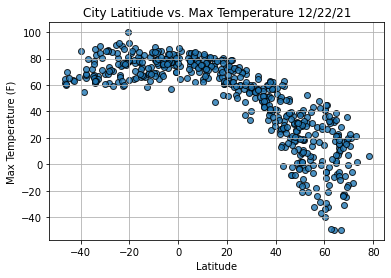

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitiude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

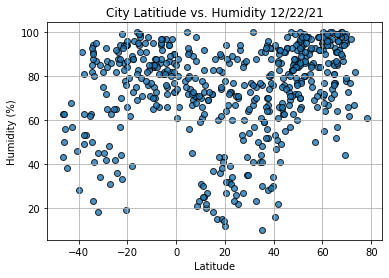

In [24]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitiude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

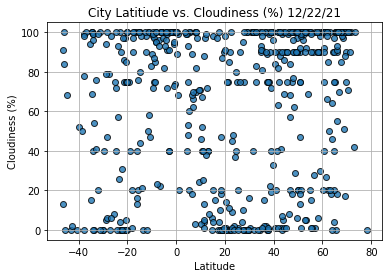

In [25]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitiude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

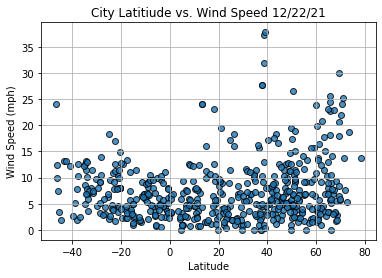

In [26]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitiude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()